In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#cancerch = datasets.load_cancerch()
#cancerch.data.shape
cancerch = datasets.load_breast_cancer()
cancerch.data.shape

(569, 30)

In [ ]:
cancerch.feature_names     #نام یا تعداد ویژگی ها یا ستون های مجموعه داده

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancerch.target_names   #نام کلاس ها یا تعداد نمونه ها یا تعداد ردیف های محموعه داده

array(['malignant', 'benign'], dtype='<U9')

In [5]:
cancerch_df = pd.DataFrame(cancerch.data, columns=cancerch.feature_names)
cancerch_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


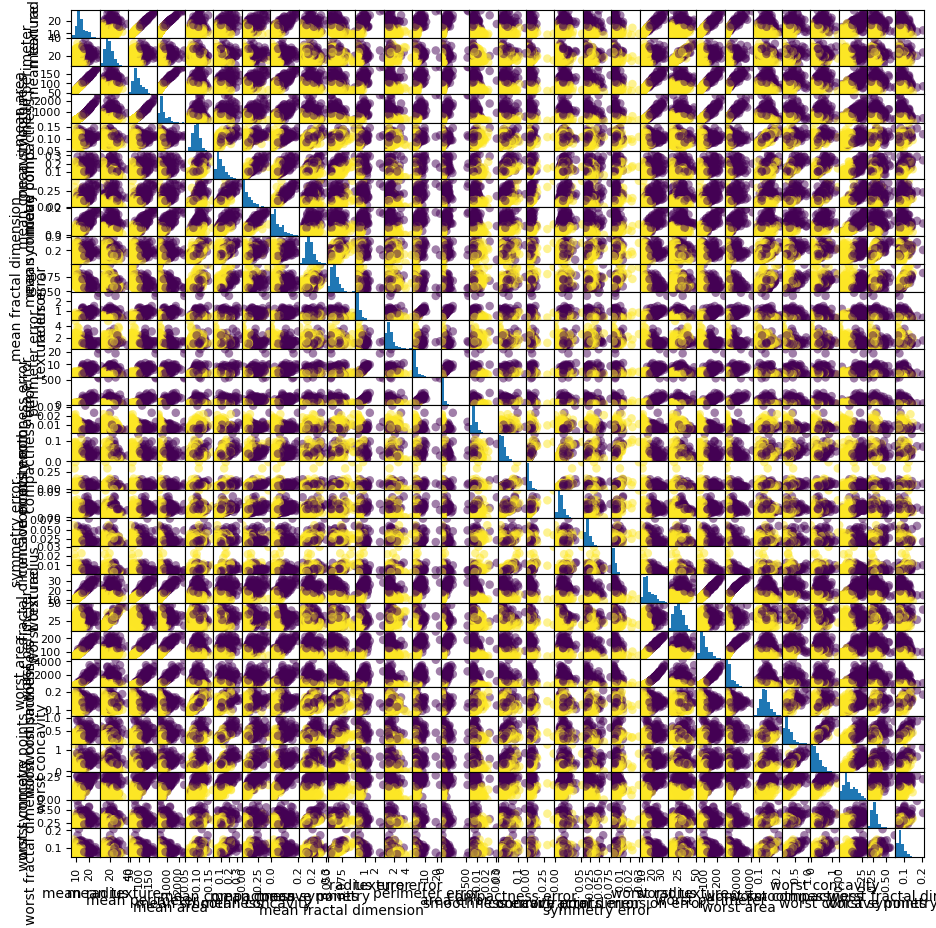

In [6]:
pd.plotting.scatter_matrix(cancerch_df, c=cancerch.target, figsize=[11, 11], s=150)
plt.show()


<h1KNN : K-Nearest Neighbors/>

<h1 KNN : K-Nearest Neighbors/>

<h1>KNN : K-Nearest Neighbors</h1>

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski',p=2)
x = cancerch.data
y = cancerch.target
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=10)

<h1>Predict</h1>

In [7]:
xx = np.array([[1, 1, 1, 6]])
yy = knn.predict(xx)
print(yy)

ValueError: X has 4 features, but KNeighborsClassifier is expecting 30 features as input.

<h1>Train and test</h1>

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancerch.data, cancerch.target, test_size=0.3, random_state=42, stratify=cancerch.target)

In [9]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
y_predict

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, x_train, y_train, cv=10, scoring="accuracy")
#cv=10  array([1.        , 0.90909091, 1.        , 0.90909091, 1.        ,0.9       , 1.        , 0.9       , 1.        , 1.        ])

array([0.95      , 0.95      , 0.925     , 0.9       , 0.85      ,
       0.975     , 0.95      , 0.975     , 0.87179487, 1.        ])

In [ ]:
knn.score(x_test, y_test)   #و دقت (accuracy) پیش‌بینی‌های مدل را برمی‌گرداند
#cv=10  score=0.9555555555555556

0.935672514619883

<h1>Feature Extarction</h1>

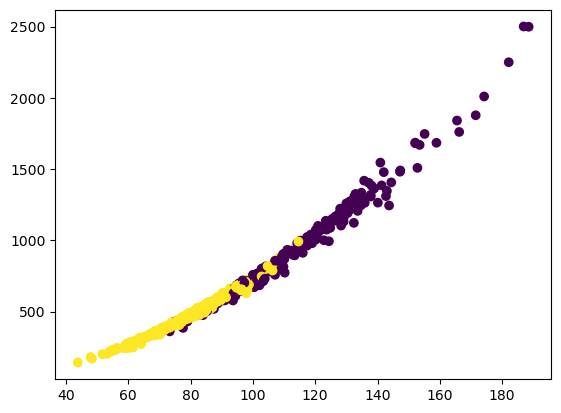

(569, 30)

In [13]:
x2 = cancerch.data[:, [2, 3]] #only use petal length and width
y2 = cancerch.target
plt.scatter(x2[:,0],x2[:,1], c=y2)
plt.show()
x.shape

In [14]:
x_train, x_test, y_train, y_test = train_test_split(cancerch.data[:, [0,2,3]], cancerch.target, test_size=
0.3, random_state=42, stratify=cancerch.target)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.8713450292397661

<h1>Cross Validation</h1>

In [15]:
from sklearn.model_selection import cross_val_score
x=cancerch.data[:, :]
y=cancerch.target
knn= knn.fit(x, y)
cv_scores = cross_val_score(knn, x, y, cv=10)
np.mean(cv_scores)

0.9315162907268169

<h1>Over Fitting and Under Fitting</h1>

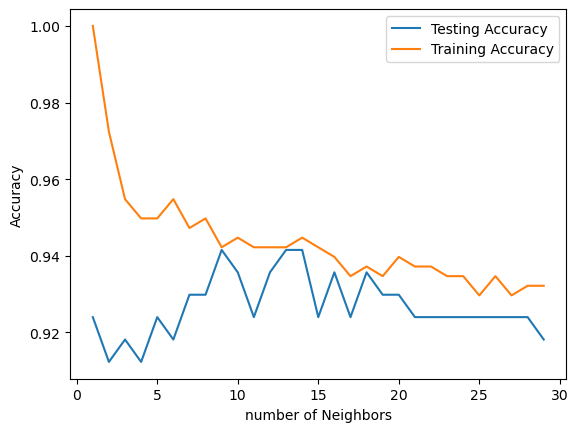

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(cancerch.data[:, :], cancerch.target, test_size=
0.3, random_state=42, stratify=cancerch.target)
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i] = knn_model.score(x_train, y_train)
    test_accuracy[i] = knn_model.score(x_test, y_test)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')# رسم نمودار دقت برای داده های تست
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')# رسم نمودار دقت برای داده های آموزشی
plt.legend()#  افزودن راهنمای نمودار
plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<h1>Confusion matrix</h1>

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(cancerch.data[:, [0,1,2,3]], cancerch.target, test_size=
0.3, random_state=42, stratify=cancerch.target)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_prediction = knn.predict(x_test)
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
#  precision    recall  f1-score   support

 #          0       0.91      0.75      0.82        64
#         1       0.86      0.95      0.91       107

 #   accuracy                           0.88       171
  # macro avg       0.89      0.85      0.86       171
#weighted avg       0.88      0.88      0.87       171

[[ 48  16]
 [  5 102]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        64
           1       0.86      0.95      0.91       107

    accuracy                           0.88       171
   macro avg       0.89      0.85      0.86       171
weighted avg       0.88      0.88      0.87       171



<h1>StartNB</h1>

<h1>NB : GaussianNB()</h1>

In [19]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
x = cancerch.data
y = cancerch.target
nb.fit(x, y)

GaussianNB()

<h1>Predict</h1>

In [20]:
xx = np.array([[1, 1, 1, 6]])
yy = nb.predict(xx)
print(yy)

ValueError: X has 4 features, but GaussianNB is expecting 30 features as input.

<h1>Train and test</h1>

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancerch.data, cancerch.target, test_size=
0.3, random_state=42, stratify=cancerch.target)

In [22]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_predict = nb.predict(x_test)
y_predict

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(nb, x_train, y_train, cv=10, scoring="accuracy")
#cv=10 array([0.975     , 0.85      , 1.        , 0.975     , 0.95      , 0.875     , 0.925     , 0.975     , 0.94871795, 0.94871795])

array([0.975     , 0.85      , 1.        , 0.975     , 0.95      ,
       0.875     , 0.925     , 0.975     , 0.94871795, 0.94871795])

In [24]:
nb.score(x_test, y_test)
#cv=10  score=0.9473684210526315

0.9473684210526315

<h1>Feature Extarction</h1>

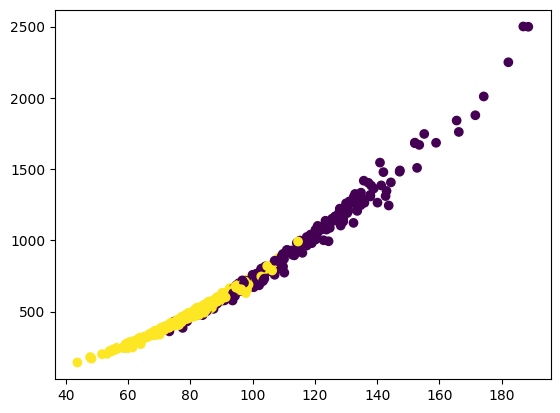

(569, 30)

In [25]:
x2 = cancerch.data[:, [2, 3]] #only use petal length and width
y2 = cancerch.target
plt.scatter(x2[:,0],x2[:,1], c=y2)
plt.show()
x.shape

In [26]:
x_train, x_test, y_train, y_test = train_test_split(cancerch.data[:, [0,2,3]], cancerch.target, test_size=
0.3, random_state=42, stratify=cancerch.target)
nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.8771929824561403

<h1>Cross Validation</h1>

In [27]:
from sklearn.model_selection import cross_val_score
x=cancerch.data[:, :]
y=cancerch.target
nb= nb.fit(x, y)
cv_scores = cross_val_score(nb, x, y, cv=10)
np.mean(cv_scores)

0.9367794486215537

<h1>Over Fitting and Under Fitting</h1>

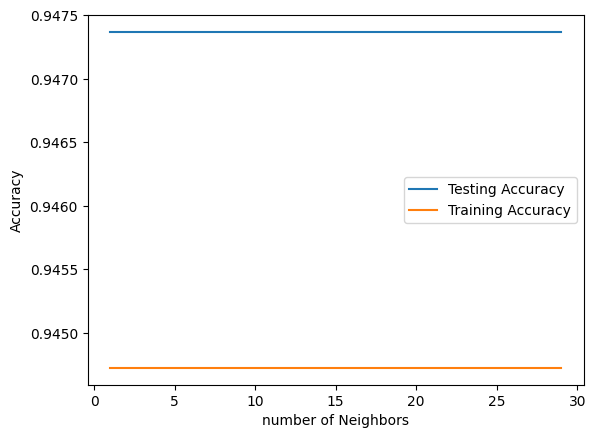

In [28]:
x_train, x_test, y_train, y_test = train_test_split(cancerch.data[:, :], cancerch.target, test_size=
0.3, random_state=42, stratify=cancerch.target)
nb = np.arange(1, 30)
train_accuracy = np.empty(len(nb))
test_accuracy = np.empty(len(nb))
for i,k in enumerate(nb):
    nb_model = GaussianNB()
    nb_model.fit(x_train, y_train)
    train_accuracy[i] = nb_model.score(x_train, y_train)
    test_accuracy[i] = nb_model.score(x_test, y_test)
plt.plot(nb, test_accuracy, label = 'Testing Accuracy')
plt.plot(nb, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<h1>Confusion matrix</h1>

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(cancerch.data[:, [0,1,2,3]], cancerch.target, test_size=
0.3, random_state=42, stratify=cancerch.target)
nb = GaussianNB()
nb.fit(x_train, y_train)
y_prediction = nb.predict(x_test)
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
# precision    recall  f1-score   support

 #          0       0.83      0.78      0.81        64
#         1       0.87      0.91      0.89       107

  #  accuracy                           0.86       171
  # macro avg       0.85      0.84      0.85       171
#weighted avg       0.86      0.86      0.86       171

#recall in NB is bigger than KNN
#f1_score in NB is bigger than KNN
#accuracy in KNN is bigger than NB
#recall in more impotant than other because it has more accurate

[[50 14]
 [10 97]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        64
           1       0.87      0.91      0.89       107

    accuracy                           0.86       171
   macro avg       0.85      0.84      0.85       171
weighted avg       0.86      0.86      0.86       171

